# FIFA Moneyball

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
#Read the dataset provided

all_players = pd.read_csv("./fifa21_male2.csv")

C:\Users\Flor Roa\AppData\Local\Temp\ipykernel_3044\884033819.py:3: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  all_players = pd.read_csv("./fifa21_male2.csv")


In [3]:
#Check all the columns avaliable

list(all_players.columns)

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [4]:
#Value & Release Clause Column
def format_money(column):
    values = []
    for value in all_players[column]:
        if value[-1]=='M':
            money = 1000000
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money)
    return values

def format_release_clause():
    release_clause = []
    for clause in all_players['Release Clause'].fillna(''):
        if clause == '':
            money=0.0
        elif clause[-1]=='M':
            money = 1000000
            money *= float(clause[1:-1])
        elif clause[-1]=='K':
            money = 1000
            money *= float(clause[1:-1])
        else: 
            money = 0
        release_clause.append(money)
    return release_clause

all_players['Value'] =  format_money('Value')
all_players['Wage'] = format_money('Wage')
all_players['Release Clause'] = format_release_clause()

In [5]:
(all_players).describe()

,ID,Age,OVA,BOV,POT,Growth,Value,Wage,Release Clause,Attacking,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,1.712500e+04,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,2.567377e+06,10436.963504,4.574445e+06,258.537752,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,5.372622e+06,21191.481943,1.033846e+07,72.255687,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,0.000000e+00,0.000000,0.000000e+00,33.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,3.750000e+05,1000.000000,5.080000e+05,232.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,8.000000e+05,3000.000000,1.300000e+06,271.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,2.400000e+06,11000.000000,3.900000e+06,306.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,1.055000e+08,560000.000000,2.031000e+08,437.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [6]:
#Get a quick view of the dataset and the type of information contained 

all_players.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [7]:
#Aplying some changes to the base dataset
all_players['BP'] = all_players['BP'].astype(str)
all_players.fillna(0, inplace=True)

In [8]:
#This specific column is quite messy and difficult to work with, we will try to get the contract dates separately although we know it won't work in all cases.
# We will see later if this is enough for our analysis or if it is necessary to invest more time correcting it.

all_players[['start_year', 'end_year']] = all_players['Contract'].str.extract('(\d{4})\D+(\d{4})?')
all_players[['start_year', 'end_year']] = all_players[['start_year', 'end_year']].fillna(0)
all_players[['start_year', 'end_year']] = all_players[['start_year', 'end_year']].astype(int)


## Problem definition and analysis approach

Our assigned group is **AC Milan**, so we have decided to focus our analysis on the characteristics of this Club, who are the players in this team and how we can improve performance while saving budget.

## Filtered dataset

In [9]:
#After checking the columns contained in the original dataset, we decided that the following fields were the most relevant fields for our analysis

players_info =all_players[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause', 'Total Stats', 'Team & Contract','start_year', 'end_year']]

In [10]:
players_info.head()

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Team & Contract,start_year,end_year
0,G. Pasquale,33,Udinese,71,LWB,69,625000.0,7000.0,0.0,1929,Udinese 2008 ~ 2016,2008,2016
1,Luis García,37,KAS Eupen,70,CM,71,600000.0,7000.0,1100000.0,1906,KAS Eupen 2014 ~ 2019,2014,2019
2,J. Cole,33,Coventry City,71,CAM,71,1100000.0,15000.0,0.0,1770,Coventry City 2016 ~ 2020,2016,2020
3,D. Yorke,36,Sunderland,70,ST,82,0.0,0.0,0.0,1348,Sunderland 2009,0,0
4,Iniesta,36,Vissel Kobe,82,CAM,81,5500000.0,12000.0,7200000.0,2014,Vissel Kobe 2018 ~ 2021,2018,2021


In [11]:
players_info.isnull()
players_info.isnull().sum()

Name               0
Age                0
Club               0
BOV                0
BP                 0
POT                0
Value              0
Wage               0
Release Clause     0
Total Stats        0
Team & Contract    0
start_year         0
end_year           0
dtype: int64

#### Descriptions

* **BP**: Best position, some players can play in several positions, but we want to take the performance based in the best position.
* **BOV**: Best Overall Rating.
* **POT**: Potential.
* **Value**: What is the value of this player in the market.
* **Release Clause**: How much will the club be paid if this player goes to other club.
* **Total Stats**: A summary of all the different characteristics from the player.

In [12]:
display(players_info.dtypes)

Name                object
Age                  int64
Club                object
BOV                  int64
BP                  object
POT                  int64
Value              float64
Wage               float64
Release Clause     float64
Total Stats          int64
Team & Contract     object
start_year           int32
end_year             int32
dtype: object

In [13]:
players_info.describe()

,Age,BOV,POT,Value,Wage,Release Clause,Total Stats,start_year,end_year
count,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000
mean,25.272934,67.900204,72.489810,2.567377e+06,10436.963504,4.574445e+06,1631.256175,1972.349781,1868.227971
std,4.942665,6.637538,5.769949,5.372622e+06,21191.481943,1.033846e+07,260.357024,302.298801,535.481432
min,16.000000,42.000000,47.000000,0.000000e+00,0.000000,0.000000e+00,731.000000,0.000000,0.000000
25%,21.000000,64.000000,69.000000,3.750000e+05,1000.000000,5.080000e+05,1492.000000,2017.000000,2021.000000
50%,25.000000,68.000000,72.000000,8.000000e+05,3000.000000,1.300000e+06,1659.000000,2019.000000,2021.000000
75%,29.000000,72.000000,76.000000,2.400000e+06,11000.000000,3.900000e+06,1812.000000,2020.000000,2023.000000
max,53.000000,93.000000,95.000000,1.055000e+08,560000.000000,2.031000e+08,2316.000000,4912.000000,2028.000000


In general we can see that the average age for a football player is 25 years old, and the average of the BOV and POT is 67 points and 72 points respectively with total stats around 1631.

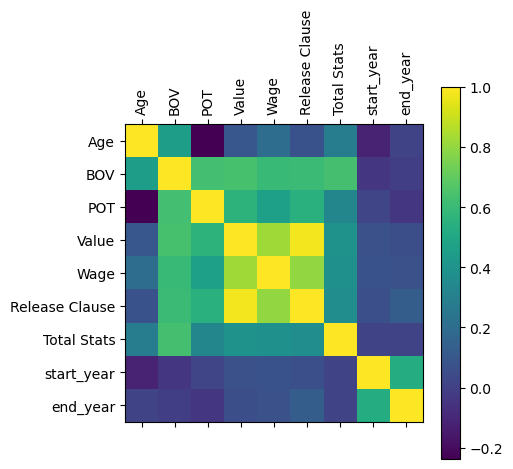

In [14]:
#Check how are all these characteristics related

plt.matshow(players_info.corr())
plt.xticks(range(9),players_info.corr().columns,rotation=90)
plt.yticks(range(9),players_info.corr().columns)
plt.colorbar()
plt.show()

From this grahp we get the following conclusions:
* Age vs POT: these are negative related since the older the player, the less growth potential he has.
* BOV vs Total Stats: the better stats the player has, the higher BOV he gets, making him a top player.
* Wage vs BOV: the salaray of the player is related to how good he is, so the higher the BOV the higher the wage.

## AC Milan players

Now we are going to analayze the players in the AC Milan club to try to identify what improvements can be done.

In [15]:
#Segregate the players that belong to the club

ac_milan_players = players_info[players_info['Club'] == 'Milan']

In [16]:
#Since the potential of the players decreases with the age, we want to see which are the older players in the team 

ac_milan_players = ac_milan_players.sort_values(by='Age', ascending= False)
ac_milan_players

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Team & Contract,start_year,end_year
25,P. Maldini,40,Milan,78,CB,89,0.0,0.0,0.0,1471,Milan 2009,0,0
184,Z. Ibrahimović,38,Milan,83,ST,83,9500000.0,49000.0,16200000.0,1996,Milan 2020 ~ 2021,2020,2021
30,C. Abbiati,37,Milan,75,GK,75,1300000.0,40000.0,0.0,1160,Milan 2016 ~ 2020,2016,2020
62,Cafu,37,Milan,86,CF,88,0.0,0.0,0.0,1641,Milan 2007,0,0
29,F. Inzaghi,37,Milan,72,ST,73,350000.0,15000.0,0.0,1507,Milan 2001 ~ 2012,2001,2012
3833,C. Tătărușanu,34,Milan,78,GK,78,4500000.0,30000.0,7700000.0,1244,Milan 2020 ~ 2023,2020,2023
79,M. Jankulovski,33,Milan,75,LM,85,0.0,0.0,0.0,2044,Milan 2005 ~ 2011,2005,2011
185,P. Mexès,33,Milan,77,CB,77,3100000.0,60000.0,0.0,1813,Milan 2011 ~ 2016,2011,2016
411,Alex,33,Milan,78,CB,79,4500000.0,80000.0,0.0,1757,Milan 2014 ~ 2016,2014,2016
800,R. Montolivo,33,Milan,78,CM,78,4200000.0,70000.0,7100000.0,2003,Milan 2012 ~ 2023,2012,2023


We see that for some of those older players there is no wage asigned, also, their contrat seems to be expired, which makes them "non-active players". In that case, we have to exclude them.

In [17]:
ac_milan_players = ac_milan_players.loc[(ac_milan_players.Wage > 0.00)]
ac_milan_players = ac_milan_players.loc[(ac_milan_players.end_year >= 2021)]

In [18]:
ac_milan_players

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Team & Contract,start_year,end_year
184,Z. Ibrahimović,38,Milan,83,ST,83,9500000.0,49000.0,16200000.0,1996,Milan 2020 ~ 2021,2020,2021
3833,C. Tătărușanu,34,Milan,78,GK,78,4500000.0,30000.0,7700000.0,1244,Milan 2020 ~ 2023,2020,2023
800,R. Montolivo,33,Milan,78,CM,78,4200000.0,70000.0,7100000.0,2003,Milan 2012 ~ 2023,2012,2023
1041,I. Abate,31,Milan,76,RWB,77,6000000.0,70000.0,10200000.0,1973,Milan 2009 ~ 2023,2009,2023
1594,S. Kjær,31,Milan,80,CB,80,11000000.0,43000.0,18700000.0,1839,Milan 2020 ~ 2022,2020,2022
3800,I. Strinić,31,Milan,72,LB,73,2900000.0,30000.0,4900000.0,1916,Milan 2018 ~ 2021,2018,2021
2096,M. Musacchio,29,Milan,78,CB,78,8500000.0,38000.0,14500000.0,1861,Milan 2017 ~ 2021,2017,2021
3808,A. Donnarumma,29,Milan,66,GK,66,450000.0,8000.0,765000.0,952,Milan 2017 ~ 2021,2017,2021
5868,D. Laxalt,27,Milan,77,LM,77,9500000.0,38000.0,16200000.0,1983,Milan 2018 ~ 2022,2018,2022
4927,H. Çalhanoğlu,26,Milan,80,CAM,79,13500000.0,48000.0,23000000.0,2059,Milan 2017 ~ 2021,2017,2021


In [19]:
ac_milan_players['BP'].value_counts().sum()

33

We have 33 active players in the team, considering that we need more or less 22 players for a match, we think there might be some players that we could release. For that, first we are going to check the amount of players we have per position.

#### How does each position play?

* **GK**: A goalkeeper **(GK)** is essentially a team’s last line of defence. Goalkeeper is the most defensive position in football.
* **Defenders - Centre backs**: Centre backs **(CB)** or central defenders are centrally placed defenders just in front of the team’s goal. 
* **Defenders - Full backs**: The defenders who operate from either side of their centre backs are termed as full backs or side backs. they are further distinguished as a left back **(LB)** or a right back **(RB)**.
* **Central midfielders**: Midfielders located centrally on the pitch are called central midfielders **(CM)**.The number of central midfielders mostly depends on the team’s strategy. 
* **Central defensive midfielders** **(CDM)**: is tasked to primarily defend by staying in front of their backline. Players specialising as CDMs mostly have a high work rate and are good at tackling and interceptions.  
* **Central attacking midfielders** **(CAM)**: Are More attack-minded central midfielders who prioritise supporting the forwards in attack rather than defence. CAMs generally possess the ability to play killer final passes and can shoot well from distance.
* **Wingers**: Midfielders who operate from the flanks just ahead of the full backs are called wingers. They are called left wingers **(LW)** or right wingers **(RW)** according to their position on the pitch. While they do help their full backs defensively, a winger’s primary task is to attack and take on opposition defenders.
* **Forwards or strikers**: are the team’s most advanced players on the pitch, whose job is exclusively to score goals. A forward who plays more centrally just in front of the opposition goal is called a centre forward **(CF)**. Some teams often deploy forwards in the lane between the wingers and the centre forwards. These strikers are referred to as right forwards **(RF)** or left forwards **(LF)** according to which side they are playing from.


![Field_positions](./Field_positions.png)

#### AC Milan game strategy

Stefano Pioli (manager of the club) likes to use a 4-2-3-1 formation in which the fullbacks **-LB RB-** pick up advanced roles on the pitch. As the game progresses, their fullbacks take up offensive positions, often ending up in or near the striker position. 

Defensively, one of their fullbacks  **-LB RB-**  tucks inside with the two central defenders **-CB-** turning it into a back three. One of the midfielders **-CDM CAM-** enters the vacated space left by the fullback. When they get the ball back, they immediately attack by initiating quick passes and their fullbacks **-LB RB-** end up near the striking positions in the last phase of their offensive play.

When the team attacks, both the fullbacks **-LB RB-**  take up advanced positions in the center of the pitch. The two midfielders  **-CDM CAM-** cover the space vacated by the fullbacks, leading to a type of front six and a back four. The team also likes to exploit width by allowing their wingers **-LW RW-** to stay in wide positions.

Sometimes, the attacking midfielders **-CAM-** drop into wide positions and one of the defensive midfielders **-CDM-** comes up to that side and the three form a triangle, with quick interchange of passes and establish a 3v1 or a 3v2 dominance. It is because of this that they can put pin-point crosses to the center of the pitch and a fullback **-LB RB-** usually ends up in that center space.

In [20]:
#We have a lot of CAM players and CB players in the team to sustain the defensive strategy of the club, however at the time we are lacking for LW and RW positions

ac_milan_players.groupby(['BP']).agg({'BOV':('mean','count'),'Age':'mean','Wage':'mean' })

BOV              Age          Wage
          mean count       mean          mean
BP                                           
CAM  74.500000     6  23.500000  28166.666667
CB   72.625000     8  23.875000  28000.000000
CDM  81.000000     1  23.000000  33000.000000
CM   73.750000     4  23.750000  31250.000000
GK   76.333333     3  28.000000  24000.000000
LB   76.000000     2  26.500000  33500.000000
LM   77.000000     1  27.000000  38000.000000
RB   76.000000     1  23.000000  27000.000000
RM   75.000000     2  21.000000  23500.000000
RWB  77.000000     2  28.500000  52000.000000
ST   75.333333     3  27.333333  33333.333333

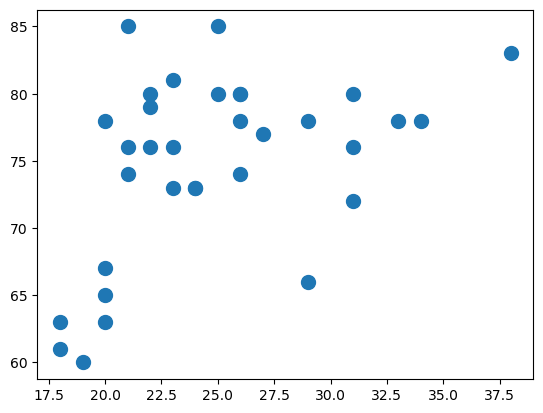

In [21]:
#Now we take a look in the players age and BOV

plt.scatter(ac_milan_players['Age'],ac_milan_players['BOV'], s = 100)
plt.show()

Majority of the players have BOV between 75 and 80, and are between ages of 22 and 30. From this perspective, we should check the POT of the younger players and the the contracts of the olders, the BOV for the olders is still between average of the team, but we know that they probably retire soon. While there isn't an exact age for footballers to retire, the largest host of professional players hang their boots between the ages of 33 and 37, with 35 being the accepted average.

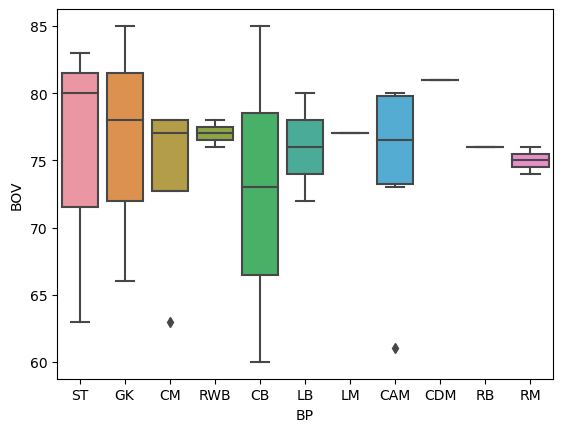

In [22]:
sns.boxplot(x='BP',y='BOV', data = ac_milan_players)
plt.show()

From the graph we can take that there are some outliers regarding BOV score in the different positions, but we already saw that we have some younger members of the team that are not yet in their full potential. So we will need to deep dive in each of the positions teams to make a better assesment.

In order to compare with the rest of the clubs positons stats, we are going to exclude the inactive players from there, and of course exclude the players from AC Milan.

In [23]:
active_players_info = players_info.loc[(players_info.Wage > 0.00)]
active_players_info = players_info.loc[(players_info.Club != 'Milan')]

In [24]:
general_stats = active_players_info.groupby(['BP']).agg({'BOV':'mean'})

In [25]:
ac_milan_stats = ac_milan_players.groupby(['BP']).agg({'BOV':'mean'})

In [26]:
stats_comparison = pd.merge(general_stats, ac_milan_stats, on='BP', how='left')
stats_comparison.fillna(0, inplace=True)
stats_comparison = stats_comparison.rename(columns = {'BOV_x' : 'General avg. BOV', 'BOV_y' : 'AC Milan avg. BOV'})

In [27]:
stats_comparison['Comparison'] = ((((stats_comparison['AC Milan avg. BOV'] - stats_comparison['General avg. BOV'])/stats_comparison['AC Milan avg. BOV'])*100))
stats_comparison['Comparison'] = (stats_comparison['Comparison'].replace(-np.inf, -100))
stats_comparison['Comparison'] = (stats_comparison['Comparison'].astype(int)).astype(str) + '%'

In [28]:
stats_comparison

,General avg. BOV,AC Milan avg. BOV,Comparison
BP,,,
CAM,68.387226,74.500000,8%
CB,67.962357,72.625000,6%
CDM,69.420884,81.000000,14%
CF,73.761364,0.000000,-100%
CM,69.588235,73.750000,5%
GK,66.534351,76.333333,12%
LB,66.943417,76.000000,11%
LM,67.640100,77.000000,12%
LW,68.813397,0.000000,-100%


In average it seems like the team is better than the general population of the rest of the players, negative values are coming from not avaliable positions in the club. So now lets deep dive in detail per possition to try and find a way to improve or manatain the performance and find the missing players while saving some budget.

## Current budget

In [29]:
ac_milan_players

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Team & Contract,start_year,end_year
184,Z. Ibrahimović,38,Milan,83,ST,83,9500000.0,49000.0,16200000.0,1996,Milan 2020 ~ 2021,2020,2021
3833,C. Tătărușanu,34,Milan,78,GK,78,4500000.0,30000.0,7700000.0,1244,Milan 2020 ~ 2023,2020,2023
800,R. Montolivo,33,Milan,78,CM,78,4200000.0,70000.0,7100000.0,2003,Milan 2012 ~ 2023,2012,2023
1041,I. Abate,31,Milan,76,RWB,77,6000000.0,70000.0,10200000.0,1973,Milan 2009 ~ 2023,2009,2023
1594,S. Kjær,31,Milan,80,CB,80,11000000.0,43000.0,18700000.0,1839,Milan 2020 ~ 2022,2020,2022
3800,I. Strinić,31,Milan,72,LB,73,2900000.0,30000.0,4900000.0,1916,Milan 2018 ~ 2021,2018,2021
2096,M. Musacchio,29,Milan,78,CB,78,8500000.0,38000.0,14500000.0,1861,Milan 2017 ~ 2021,2017,2021
3808,A. Donnarumma,29,Milan,66,GK,66,450000.0,8000.0,765000.0,952,Milan 2017 ~ 2021,2017,2021
5868,D. Laxalt,27,Milan,77,LM,77,9500000.0,38000.0,16200000.0,1983,Milan 2018 ~ 2022,2018,2022
4927,H. Çalhanoğlu,26,Milan,80,CAM,79,13500000.0,48000.0,23000000.0,2059,Milan 2017 ~ 2021,2017,2021


In [30]:
wages_expense = (ac_milan_players['Wage'].sum())*12
wages_expense

12072000.0

## Analysis per position

In order to verify the specific characteristics of the players according to the position they play, we have added many more details to a new dataframe.

In [31]:
stats_check = all_players[['ID',
 'Name',
 'Age',
 'Club',
 'BOV',
 'BP',
 'POT',
 'Team & Contract',
 'start_year', 
 'end_year',
 'Height',
 'Weight',
 'foot',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats']]

In [32]:
stats_check = stats_check.loc[(players_info.Wage > 0.00)]
stats_check.head()

,ID,Name,Age,Club,BOV,BP,POT,Team & Contract,start_year,end_year,...,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats
0,2,G. Pasquale,33,Udinese,71,LWB,69,Udinese 2008 ~ 2016,2008,2016,...,70,69,69.0,56,14,5,15,10,12,1929
1,16,Luis García,37,KAS Eupen,70,CM,71,KAS Eupen 2014 ~ 2019,2014,2019,...,70,43,40.0,56,9,12,13,11,11,1906
2,27,J. Cole,33,Coventry City,71,CAM,71,Coventry City 2016 ~ 2020,2016,2020,...,35,34,30.0,51,9,6,13,16,7,1770
4,41,Iniesta,36,Vissel Kobe,82,CAM,81,Vissel Kobe 2018 ~ 2021,2018,2021,...,68,57,56.0,45,6,13,6,13,7,2014
5,61,D. Odonkor,27,Alemannia Aachen,66,RW,70,Alemannia Aachen 2011 ~ 2012,2011,2012,...,22,26,31.0,46,8,13,7,9,9,1649


#### (GK) Goalkeeper
Lets explore which are the top 10 goalkeepers from the population using the stats considered relevant to this position.

In [33]:
GK_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause', 'Total Stats','Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes', 'start_year', 'end_year',]]
GK_stats = GK_stats.loc[(GK_stats.BP == 'GK' )]
GK_stats  = GK_stats.sort_values(by='BOV', ascending= False)
GK_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,start_year,end_year
3665,J. Oblak,27,Atlético Madrid,91,GK,93,75000000.0,125000.0,159400000.0,1413,437,87,92,78,90,90,2014,2023
5777,Alisson,27,Liverpool,90,GK,91,62500000.0,160000.0,120300000.0,1389,439,86,88,85,91,89,2018,2024
2790,M. ter Stegen,28,FC Barcelona,90,GK,93,69500000.0,260000.0,147700000.0,1442,439,88,85,88,88,90,2014,2022
2745,T. Courtois,28,Real Madrid,89,GK,90,56000000.0,250000.0,119000000.0,1325,420,84,89,74,85,88,2018,2024
1010,M. Neuer,34,FC Bayern München,89,GK,89,29000000.0,125000.0,47900000.0,1515,440,87,87,91,86,89,2011,2023
850,S. Handanovič,35,Inter,88,GK,88,16000000.0,100000.0,26400000.0,1317,424,88,85,73,89,89,2012,2021
5256,Ederson,26,Manchester City,88,GK,91,53500000.0,195000.0,103000000.0,1534,435,86,82,93,86,88,2017,2024
2878,K. Navas,33,Paris Saint-Germain,87,GK,87,27000000.0,110000.0,50000000.0,1380,418,90,81,75,82,90,2019,2023
2058,W. Szczęsny,30,Juventus,87,GK,87,34000000.0,105000.0,56100000.0,1317,416,86,82,73,87,88,2017,2024
1037,H. Lloris,33,Tottenham Hotspur,87,GK,87,27000000.0,125000.0,51300000.0,1361,413,89,82,68,84,90,2012,2022


In [34]:
#How many GK the other clubs have in their teams

qty_players_GK = GK_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_GK['Name'].mean()
print(averages)

2.1113138686131387


In [35]:
GK_ac_milan = GK_stats.loc[(GK_stats.Club == 'Milan' )]
GK_ac_milan = GK_ac_milan.loc[(GK_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
GK_ac_milan = GK_ac_milan.reset_index(drop=True)
GK_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,start_year,end_year
0,G. Donnarumma,21,Milan,85,GK,92,41500000.0,34000.0,78900000.0,1330,418,89,81,76,83,89,2015,2021
1,C. Tătărușanu,34,Milan,78,GK,78,4500000.0,30000.0,7700000.0,1244,387,79,76,75,77,80,2020,2023
2,A. Donnarumma,29,Milan,66,GK,66,450000.0,8000.0,765000.0,952,316,70,62,51,59,74,2017,2021


We can see from the data that:
* We have 3 players for this position, in average the rest of the teams have 2.
* Player with low BOV and low POT, around 30 years old. Contract expires this year

Given his low stats, we will include A. Donnarumma as a posible candidate for release.

In [36]:
players_to_release = pd.DataFrame()

# A. Donnarumma is located in the index 2

new_row = GK_ac_milan.iloc[[2],[0,1,3,4,5,6,7,8,9]]
players_to_release  = pd.concat([players_to_release, new_row], ignore_index=True)

#### (CB) Defenders - Centre backs
Lets explore which are the top 10 centre backs from the population using the stats considered relevant to this position.

In [37]:
CB_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause', 'Total Stats','Interceptions','Defending','Agility','Balance','Strength', 'start_year', 'end_year',]]
CB_stats = CB_stats.loc[(CB_stats.BP == 'CB' )]
CB_stats  = CB_stats.sort_values(by='BOV', ascending= False)
CB_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Interceptions,Defending,Agility,Balance,Strength,start_year,end_year
4166,V. van Dijk,28,Liverpool,90,CB,91,75500000.0,210000.0,145300000.0,2112,90.0,272,61.0,53.0,92,2018,2023
681,Sergio Ramos,34,Real Madrid,89,CB,89,24500000.0,300000.0,50200000.0,2258,88.0,263,78.0,66.0,85,2005,2021
3771,K. Koulibaly,29,Napoli,88,CB,88,50000000.0,140000.0,85000000.0,1734,87.0,267,52.0,41.0,94,2014,2023
5642,A. Laporte,26,Manchester City,88,CB,90,56000000.0,200000.0,107800000.0,1983,87.0,266,59.0,60.0,85,2018,2024
458,G. Chiellini,35,Juventus,87,CB,87,15500000.0,94000.0,25600000.0,1830,88.0,272,57.0,57.0,87,2005,2021
10212,M. de Ligt,20,Juventus,87,CB,92,49500000.0,80000.0,91600000.0,1988,83.0,253,56.0,60.0,88,2019,2024
8181,W. Ndidi,23,Leicester City,87,CB,88,36500000.0,96000.0,72100000.0,2120,90.0,261,69.0,67.0,78,2017,2024
3875,R. Varane,27,Real Madrid,87,CB,88,46500000.0,220000.0,98800000.0,1933,87.0,262,62.0,39.0,86,2011,2022
4868,Marquinhos,26,Paris Saint-Germain,87,CB,89,44000000.0,115000.0,84700000.0,1962,86.0,261,69.0,67.0,75,2013,2024
9462,M. Škriniar,25,Inter,86,CB,89,44500000.0,130000.0,76800000.0,1813,86.0,262,48.0,51.0,84,2017,2023


In [38]:
#How many CB the other clubs have in their teams

qty_players_CB = CB_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_CB['Name'].mean()
print(averages)

3.9760119940029983


In [39]:
CB_ac_milan = CB_stats.loc[(CB_stats.Club == 'Milan' )]
CB_ac_milan = CB_ac_milan.loc[(CB_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
CB_ac_milan  = CB_ac_milan.reset_index(drop=True)
CB_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Interceptions,Defending,Agility,Balance,Strength,start_year,end_year
0,A. Romagnoli,25,Milan,85,CB,87,30000000.0,51000.0,53300000.0,1782,86.0,256,59.0,53.0,79,2015,2022
1,S. Kjær,31,Milan,80,CB,80,11000000.0,43000.0,18700000.0,1839,82.0,241,48.0,53.0,77,2020,2022
2,M. Musacchio,29,Milan,78,CB,78,8500000.0,38000.0,14500000.0,1861,83.0,246,70.0,68.0,71,2017,2021
3,Léo Duarte,23,Milan,73,CB,80,3300000.0,17000.0,6300000.0,1540,73.0,223,62.0,62.0,71,2019,2024
4,G. Gómez,24,Milan,73,CB,77,6000000.0,60000.0,10700000.0,1533,76.0,229,54.0,38.0,82,2016,2021
5,P. Kalulu,20,Milan,67,CB,82,1300000.0,7000.0,3000000.0,1638,63.0,200,55.0,72.0,61,2020,2025
6,M. Gabbia,20,Milan,65,CB,78,750000.0,5000.0,1700000.0,1405,58.0,213,47.0,52.0,63,2017,2024
7,G. Bellodi,19,Milan,60,CB,71,220000.0,3000.0,512000.0,1339,54.0,193,49.0,63.0,57,2019,2023


We can see from the data that:
* We have 8 players for this position, in average the rest of the teams have 4.
* Couple of players with low BOV and low POT.

Since in general we have a better average than the rest of the population, for this position, we are going to check the scores of these players against the 75 quartile from the rest of the players, to determine which ones are lower that the average of the best.

In [40]:
Q75_BOV = CB_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = CB_stats['POT'].quantile(0.75)
print(Q75_POT)

73.0
76.0


In [41]:
CB_players_release1 = CB_ac_milan.loc[(CB_ac_milan.BOV < Q75_BOV)] 
CB_players_release1 = CB_players_release1.reset_index(drop=True)
CB_players_release1

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Interceptions,Defending,Agility,Balance,Strength,start_year,end_year
0,P. Kalulu,20,Milan,67,CB,82,1300000.0,7000.0,3000000.0,1638,63.0,200,55.0,72.0,61,2020,2025
1,M. Gabbia,20,Milan,65,CB,78,750000.0,5000.0,1700000.0,1405,58.0,213,47.0,52.0,63,2017,2024
2,G. Bellodi,19,Milan,60,CB,71,220000.0,3000.0,512000.0,1339,54.0,193,49.0,63.0,57,2019,2023


In [42]:
CB_players_release2 = CB_players_release1.loc[(CB_players_release1.POT < Q75_POT)] 
CB_players_release2 = CB_players_release2.reset_index(drop=True)
CB_players_release2

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Interceptions,Defending,Agility,Balance,Strength,start_year,end_year
0,G. Bellodi,19,Milan,60,CB,71,220000.0,3000.0,512000.0,1339,54.0,193,49.0,63.0,57,2019,2023


In [43]:
# G. Bellodi is located in the index 0

new_row = CB_players_release2.iloc[[0],[0,1,3,4,5,6,7,8,9]]
players_to_release  = pd.concat([players_to_release, new_row], ignore_index=True)

Aditionally, in the players to release we will include the bottom player from the Q75_BOV. His potential is above Q75_POT, however we want to be more eficient and we have too many players for this position. 

In [44]:
# G. Bellodi is located in the index 1

new_row = CB_players_release1.iloc[[1],[0,1,3,4,5,6,7,8,9]]
players_to_release  = pd.concat([players_to_release, new_row], ignore_index=True)

#### (LB- RB) Defenders - Full backs
Lets explore which are the top 10 full backs from the population using the stats considered relevant to this position.

In [45]:
LB_RB_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause', 'Total Stats','Aggression','Heading Accuracy','FK Accuracy','Dribbling','Crossing','foot', 'start_year', 'end_year',]]
LB_RB_stats = LB_RB_stats.loc[(LB_RB_stats.BP == 'LB' ) | (LB_RB_stats.BP == 'RB')]
LB_RB_stats = LB_RB_stats .sort_values(by='BOV', ascending= False)
LB_RB_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Aggression,Heading Accuracy,FK Accuracy,Dribbling,Crossing,foot,start_year,end_year
6387,A. Robertson,26,Liverpool,87,LB,89,53000000.0,155000.0,102000000.0,2127,85,67,38,80,90,Left,2017,2024
9212,T. Alexander-Arnold,21,Liverpool,87,RB,92,60000000.0,110000.0,115500000.0,2220,74,69,85,77,93,Right,2015,2024
4462,Carvajal,28,Real Madrid,86,RB,86,38000000.0,230000.0,77900000.0,2133,84,72,47,78,84,Right,2013,2022
2398,Jordi Alba,31,FC Barcelona,86,LB,86,32000000.0,220000.0,65600000.0,2224,76,70,63,81,85,Left,2012,2024
5253,Ricardo Pereira,26,Leicester City,85,RB,87,40500000.0,120000.0,80000000.0,2191,79,65,52,82,82,Right,2018,2023
2674,Alex Sandro,29,Juventus,85,LB,85,31500000.0,120000.0,52000000.0,2178,82,76,59,80,84,Left,2015,2023
2264,K. Walker,30,Manchester City,85,RB,85,30500000.0,170000.0,56400000.0,2188,78,74,71,79,81,Right,2017,2024
1960,Azpilicueta,30,Chelsea,84,RB,84,24500000.0,120000.0,46600000.0,2075,86,75,58,67,81,Right,2012,2022
5454,N. Tagliafico,27,Ajax,84,LB,84,27500000.0,27000.0,38500000.0,2096,84,84,40,73,82,Left,2018,2022
569,Jesús Navas,34,Sevilla FC,84,RB,84,11000000.0,43000.0,23100000.0,2170,75,75,46,84,83,Right,2017,2021


In [46]:
#How many LB_RB the other clubs have in their teams

qty_players_LB_RB = LB_RB_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_LB_RB['Name'].mean()
print(averages)

2.5260416666666665


In [47]:
LB_RB_ac_milan = LB_RB_stats.loc[(LB_RB_stats.Club == 'Milan' )]
LB_RB_ac_milan = LB_RB_ac_milan.loc[(LB_RB_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
LB_RB_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Aggression,Heading Accuracy,FK Accuracy,Dribbling,Crossing,foot,start_year,end_year
9544,T. Hernández,22,Milan,80,LB,85,17500000.0,37000.0,31100000.0,2064,75,72,64,79,80,Left,2019,2024
8541,D. Calabria,23,Milan,76,RB,81,9000000.0,27000.0,16000000.0,1892,76,64,48,70,76,Right,2015,2022
3800,I. Strinić,31,Milan,72,LB,73,2900000.0,30000.0,4900000.0,1916,72,60,55,70,76,Left,2018,2021


In [48]:
Q75_BOV = LB_RB_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = LB_RB_stats['POT'].quantile(0.75)
print(Q75_POT)

72.0
76.0


In [49]:
LB_RB_players_release = LB_RB_ac_milan.loc[(LB_RB_ac_milan.BOV < Q75_BOV)]
LB_RB_players_release

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Aggression,Heading Accuracy,FK Accuracy,Dribbling,Crossing,foot,start_year,end_year


In [50]:
LB_RB_players_release = LB_RB_players_release.loc[(LB_RB_players_release.POT < Q75_POT)] 
LB_RB_players_release

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Aggression,Heading Accuracy,FK Accuracy,Dribbling,Crossing,foot,start_year,end_year


For this position, we have around the same number as the rest of the clubs, and all our players are above average of the best. So for this position we won't be doing modifications.

#### (CM LM RM) Midfielders
Lets explore which are the top 10 central midfielders from the population using the stats considered relevant to this position.

In [51]:
M_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause', 'Total Stats','Standing Tackle','Sliding Tackle','Interceptions','Stamina', 'start_year', 'end_year',]]
M_stats = M_stats.loc[(M_stats.BP == 'CM' ) | (M_stats.BP == 'LM') | (M_stats.BP == 'RM')]
M_stats = M_stats .sort_values(by='BOV', ascending= False) 
M_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Standing Tackle,Sliding Tackle,Interceptions,Stamina,start_year,end_year
1753,T. Kroos,30,Real Madrid,88,CM,88,55000000.0,310000.0,112800000.0,2150,73,60.0,79.0,75,2014,2023
1411,L. Modrić,34,Real Madrid,87,CM,87,24500000.0,260000.0,50200000.0,2252,75,71.0,79.0,84,2012,2021
3619,H. Son,27,Tottenham Hotspur,87,LM,87,52500000.0,165000.0,99800000.0,2128,34,33.0,39.0,87,2015,2023
8489,F. de Jong,23,FC Barcelona,87,CM,90,50500000.0,190000.0,107300000.0,2185,76,77.0,82.0,90,2019,2024
4785,M. Kovačić,26,Chelsea,86,CM,86,31500000.0,120000.0,62200000.0,2135,73,66.0,74.0,79,2019,2024
9059,Arthur,23,Juventus,86,CM,89,41000000.0,98000.0,70700000.0,2163,79,70.0,77.0,76,2020,2024
9317,M. Rashford,22,Manchester United,86,RM,91,53000000.0,150000.0,111300000.0,2149,40,33.0,42.0,87,2014,2023
3171,P. Pogba,27,Manchester United,86,CM,87,50000000.0,190000.0,98800000.0,2235,67,65.0,64.0,83,2016,2021
4971,Saúl,25,Atlético Madrid,86,CM,87,38500000.0,77000.0,81800000.0,2213,78,77.0,79.0,87,2013,2026
5160,L. Goretzka,25,FC Bayern München,86,CM,88,39500000.0,105000.0,68100000.0,2255,79,75.0,79.0,83,2018,2022


In [52]:
#How many CM the other clubs have in their teams

qty_players_M = M_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_M['Name'].mean()
print(averages)

3.869309838472834


In [53]:
M_ac_milan = M_stats.loc[(M_stats.Club == 'Milan' )]
M_ac_milan = M_ac_milan.loc[(M_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
M_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Standing Tackle,Sliding Tackle,Interceptions,Stamina,start_year,end_year
11922,S. Tonali,20,Milan,78,CM,91,18500000.0,25000.0,43000000.0,2084,74,72.0,74.0,74,2017,2021
800,R. Montolivo,33,Milan,78,CM,78,4200000.0,70000.0,7100000.0,2003,72,68.0,76.0,55,2012,2023
5868,D. Laxalt,27,Milan,77,LM,77,9500000.0,38000.0,16200000.0,1983,70,68.0,66.0,91,2018,2022
8169,I. Bennacer,22,Milan,76,CM,82,8500000.0,26000.0,16200000.0,2065,72,69.0,72.0,78,2019,2024
12112,Rafael Leão,21,Milan,76,RM,83,9000000.0,26000.0,17100000.0,1805,24,21.0,21.0,65,2019,2024
12430,A. Saelemaekers,21,Milan,74,RM,81,4800000.0,21000.0,9100000.0,1905,62,58.0,61.0,65,2020,2024
16656,M. Brescianini,20,Milan,63,CM,73,475000.0,4000.0,903000.0,1635,60,62.0,54.0,68,2017,2024


In [54]:
Q75_BOV = M_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = M_stats['POT'].quantile(0.75)
print(Q75_POT)

73.0
76.0


In [55]:
M_players_release1 = M_ac_milan.loc[(M_ac_milan.BOV < Q75_BOV)]
M_players_release1= M_players_release1.reset_index(drop=True)
M_players_release1

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Standing Tackle,Sliding Tackle,Interceptions,Stamina,start_year,end_year
0,M. Brescianini,20,Milan,63,CM,73,475000.0,4000.0,903000.0,1635,60,62.0,54.0,68,2017,2024


In [56]:
M_players_release2 = M_players_release1.loc[(M_players_release1.POT < Q75_POT)] 
M_players_release2

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Standing Tackle,Sliding Tackle,Interceptions,Stamina,start_year,end_year
0,M. Brescianini,20,Milan,63,CM,73,475000.0,4000.0,903000.0,1635,60,62.0,54.0,68,2017,2024


In [57]:
# M. Brescianini is located in the index 0

new_row = M_players_release1.iloc[[0],[0,1,3,4,5,6,7,8,9]]
players_to_release  = pd.concat([players_to_release, new_row], ignore_index=True)

#### (CDM) Central defensive midfielders
Lets explore which are the top 10 central defensive midfielders from the population using the stats considered relevant to this position.

In [58]:
CDM_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause', 'Total Stats','Standing Tackle','Sliding Tackle','Interceptions','Stamina','Short Passing','Aggression', 'start_year', 'end_year',]]
CDM_stats = CDM_stats.loc[(CDM_stats.BP == 'CDM' )]
CDM_stats = CDM_stats .sort_values(by='BOV', ascending= False)
CDM_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Standing Tackle,Sliding Tackle,Interceptions,Stamina,Short Passing,Aggression,start_year,end_year
3630,Casemiro,28,Real Madrid,89,CDM,89,59500000.0,310000.0,122000000.0,2220,88,87.0,87.0,90,84,91,2013,2023
5736,J. Kimmich,25,FC Bayern München,88,CDM,90,65000000.0,145000.0,112100000.0,2269,84,79.0,82.0,95,87,89,2015,2023
6333,N. Kanté,29,Chelsea,88,CDM,88,51000000.0,190000.0,96900000.0,2169,90,85.0,91.0,96,85,90,2016,2023
5136,Fabinho,26,Liverpool,87,CDM,89,54500000.0,155000.0,104900000.0,2171,87,85.0,87.0,88,85,86,2018,2023
2435,Sergio Busquets,31,FC Barcelona,87,CDM,87,38000000.0,240000.0,77900000.0,2021,83,80.0,85.0,81,89,81,2008,2023
1869,J. Henderson,30,Liverpool,86,CDM,86,36500000.0,140000.0,67500000.0,2220,83,77.0,85.0,91,86,84,2011,2023
9351,Rodri,24,Manchester City,85,CDM,88,44000000.0,145000.0,84700000.0,2093,84,78.0,83.0,84,85,76,2019,2024
1555,R. Nainggolan,32,Inter,85,CDM,83,20000000.0,125000.0,33000000.0,2270,86,90.0,86.0,89,85,88,2018,2022
3601,Allan,29,Everton,85,CDM,83,25000000.0,115000.0,47500000.0,2173,88,86.0,88.0,92,84,90,2020,2023
1350,Lucas Leiva,33,Lazio,84,CDM,84,15000000.0,83000.0,25500000.0,2082,84,81.0,87.0,80,82,83,2017,2022


In [59]:
#How many CDM the other clubs have in their teams

qty_players_CDM = CDM_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_CDM['Name'].mean()
print(averages)

2.0333988212180745


In [60]:
CDM_ac_milan = CDM_stats.loc[(CDM_stats.Club == 'Milan' )]
CDM_ac_milan = CDM_ac_milan.loc[(CDM_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
CDM_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Standing Tackle,Sliding Tackle,Interceptions,Stamina,Short Passing,Aggression,start_year,end_year
9128,F. Kessié,23,Milan,81,CDM,82,11500000.0,33000.0,20400000.0,2133,78,74.0,80.0,92,79,86,2019,2022


In [61]:
Q75_BOV = CDM_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = CDM_stats['POT'].quantile(0.75)
print(Q75_POT)

74.0
77.0


For this position, we have around the same number as the rest of the clubs, and all our players are above average of the best. So for this position we won't be doing modifications.

#### (CAM) Central attacking midfielders 
Lets explore which are the top 10 central attacking midfielders from the population using the stats considered relevant to this position.

In [62]:
CAM_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause','Total Stats','Finishing','Dribbling','Shot Power', 'start_year', 'end_year',]]
CAM_stats = CAM_stats.loc[(CAM_stats.BP == 'CAM' )]
CAM_stats = CAM_stats .sort_values(by='BOV', ascending= False)
CAM_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Dribbling,Shot Power,start_year,end_year
2871,K. De Bruyne,29,Manchester City,91,CAM,91,87000000.0,370000.0,161000000.0,2304,82,88,91,2015,2023
5425,P. Dybala,26,Juventus,89,CAM,89,71000000.0,190000.0,122500000.0,2154,84,91,82,2015,2022
9633,J. Sancho,20,Borussia Dortmund,89,CAM,93,69500000.0,82000.0,132100000.0,1986,81,92,70,2017,2023
5633,Bruno Fernandes,25,Manchester United,88,CAM,90,63000000.0,195000.0,124400000.0,2303,77,85,89,2020,2025
10354,K. Havertz,21,Chelsea,87,CAM,93,57000000.0,105000.0,119700000.0,2058,85,86,74,2020,2025
5630,J. Brandt,24,Borussia Dortmund,87,CAM,88,40500000.0,75000.0,71900000.0,2083,77,88,81,2019,2024
5426,D. Alli,24,Tottenham Hotspur,86,CAM,87,34000000.0,105000.0,67200000.0,2190,82,84,78,2015,2024
1050,David Silva,34,Real Sociedad,86,CAM,86,22500000.0,58000.0,47300000.0,2060,72,86,72,2020,2022
4035,M. Depay,26,Olympique Lyonnais,86,CAM,88,48500000.0,115000.0,95800000.0,2095,83,85,87,2017,2021
2452,T. Müller,30,FC Bayern München,86,CAM,86,42000000.0,130000.0,69300000.0,2117,85,75,78,2008,2023


In [63]:
#How many CAM the other clubs have in their teams

qty_players_CAM = CAM_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_CAM['Name'].mean()
print(averages)

2.983739837398374


In [64]:
CAM_ac_milan = CAM_stats.loc[(CAM_stats.Club == 'Milan' )]
CAM_ac_milan = CAM_ac_milan.loc[(CAM_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
CAM_ac_milan = CAM_ac_milan.reset_index(drop=True)
CAM_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Dribbling,Shot Power,start_year,end_year
0,H. Çalhanoğlu,26,Milan,80,CAM,79,13500000.0,48000.0,23000000.0,2059,65,85,86,2017,2021
1,Samu Castillejo,25,Milan,80,CAM,80,15000000.0,42000.0,26600000.0,1933,75,82,78,2018,2023
2,Lucas Paquetá,22,Milan,79,CAM,81,10000000.0,30000.0,17800000.0,2087,72,84,77,2019,2023
3,R. Krunić,26,Milan,74,CAM,74,4600000.0,28000.0,8200000.0,2025,72,76,76,2019,2024
4,A. Halilović,24,Milan,73,CAM,77,3200000.0,19000.0,6100000.0,1773,57,75,63,2018,2021
5,D. Maldini,18,Milan,61,CAM,79,325000.0,2000.0,878000.0,1570,48,60,60,2018,2024


In [65]:
Q75_BOV = CAM_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = CAM_stats['POT'].quantile(0.75)
print(Q75_POT)

74.0
78.0


In [66]:
CAM_players_release1 = CAM_ac_milan.loc[(CAM_ac_milan.BOV < Q75_BOV)]
CAM_players_release1 = CAM_players_release1.reset_index(drop=True)
CAM_players_release1

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Dribbling,Shot Power,start_year,end_year
0,A. Halilović,24,Milan,73,CAM,77,3200000.0,19000.0,6100000.0,1773,57,75,63,2018,2021
1,D. Maldini,18,Milan,61,CAM,79,325000.0,2000.0,878000.0,1570,48,60,60,2018,2024


In [67]:
CAM_players_release2 = CAM_players_release1.loc[(CAM_players_release1.POT < Q75_POT)] 
CAM_players_release2

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Dribbling,Shot Power,start_year,end_year
0,A. Halilović,24,Milan,73,CAM,77,3200000.0,19000.0,6100000.0,1773,57,75,63,2018,2021


In [68]:
# M. D. Maldini is located in the index 0

new_row = CAM_players_release1.iloc[[0],[0,1,3,4,5,6,7,8,9]]
players_to_release = pd.concat([players_to_release, pd.DataFrame(new_row, index=[0])], ignore_index=True)

#### (LW LWB - RW RWB) Wingers 
Lets explore which are the top 10 wingers from the population using the stats considered relevant to this position.

In [69]:
LW_RW_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause', 'Total Stats','Acceleration','Sprint Speed','Dribbling','Ball Control', 'Curve', 'Finishing','foot', 'start_year', 'end_year',]]
LW_RW_stats = LW_RW_stats.loc[(LW_RW_stats.BP == 'LW' ) | (LW_RW_stats.BP == 'LWB') | (LW_RW_stats.BP == 'RW') | (LW_RW_stats.BP == 'RWB')]
LW_RW_stats = LW_RW_stats .sort_values(by='BOV', ascending= False)
LW_RW_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Acceleration,Sprint Speed,Dribbling,Ball Control,Curve,Finishing,foot,start_year,end_year
752,L. Messi,33,FC Barcelona,93,RW,93,67500000.0,560000.0,138400000.0,2231,91,80,96,96,93.0,95,Left,2004,2021
2650,Neymar Jr,28,Paris Saint-Germain,91,LW,91,90000000.0,270000.0,166500000.0,2175,94,89,95,95,88.0,87,Right,2017,2022
5109,M. Salah,28,Liverpool,90,RW,90,78000000.0,250000.0,144300000.0,2211,94,92,90,89,83.0,91,Left,2017,2023
5030,S. Mané,28,Liverpool,90,LW,90,78000000.0,250000.0,144300000.0,2203,95,93,91,89,76.0,90,Right,2016,2023
1800,E. Hazard,29,Real Madrid,88,LW,88,58000000.0,350000.0,118900000.0,2105,91,86,93,91,83.0,82,Right,2019,2024
4049,R. Sterling,25,Manchester City,88,LW,90,72500000.0,270000.0,139600000.0,2111,96,90,90,88,77.0,85,Right,2015,2023
6605,Bernardo Silva,25,Manchester City,87,RW,88,60000000.0,230000.0,115500000.0,2124,85,78,92,92,84.0,79,Left,2017,2025
1892,A. Di María,32,Paris Saint-Germain,87,RW,87,39000000.0,160000.0,72200000.0,2168,82,83,88,87,89.0,79,Left,2015,2021
3329,L. Insigne,29,Napoli,85,LW,85,37500000.0,120000.0,63800000.0,2001,92,84,90,93,87.0,75,Right,2010,2022
5223,Grimaldo,24,SL Benfica,85,LWB,88,35500000.0,20000.0,73700000.0,2183,86,84,84,83,85.0,52,Left,2016,2023


In [70]:
#How many LW_RW the other clubs have in their teams

qty_players_LW_RW = LW_RW_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_LW_RW['Name'].mean()
print(averages)

1.886266094420601


In [71]:
LW_RW_ac_milan = LW_RW_stats.loc[(LW_RW_stats.Club == 'Milan' )]
LW_RW_ac_milan = LW_RW_ac_milan.loc[(LW_RW_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
LW_RW_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Acceleration,Sprint Speed,Dribbling,Ball Control,Curve,Finishing,foot,start_year,end_year
7402,A. Conti,26,Milan,78,RWB,80,9500000.0,34000.0,16900000.0,1953,72,77,74,76,67.0,58,Right,2017,2022
1041,I. Abate,31,Milan,76,RWB,77,6000000.0,70000.0,10200000.0,1973,77,85,75,75,69.0,38,Right,2009,2023


Currently only has RWB players. In order to select the best candidates that we can afford, we will separate the players in LW and RW

In [72]:
LW_stats = LW_RW_stats.loc[(LW_RW_stats.BP == 'LW')| (LW_RW_stats.BP == 'LWB')]
LW_stats = LW_stats .sort_values(by='BOV', ascending= False)
LW_stats 

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Acceleration,Sprint Speed,Dribbling,Ball Control,Curve,Finishing,foot,start_year,end_year
2650,Neymar Jr,28,Paris Saint-Germain,91,LW,91,90000000.0,270000.0,166500000.0,2175,94,89,95,95,88.0,87,Right,2017,2022
5030,S. Mané,28,Liverpool,90,LW,90,78000000.0,250000.0,144300000.0,2203,95,93,91,89,76.0,90,Right,2016,2023
1800,E. Hazard,29,Real Madrid,88,LW,88,58000000.0,350000.0,118900000.0,2105,91,86,93,91,83.0,82,Right,2019,2024
4049,R. Sterling,25,Manchester City,88,LW,90,72500000.0,270000.0,139600000.0,2111,96,90,90,88,77.0,85,Right,2015,2023
3329,L. Insigne,29,Napoli,85,LW,85,37500000.0,120000.0,63800000.0,2001,92,84,90,93,87.0,75,Right,2010,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,J. Davies,20,Brighton & Hove Albion,55,LWB,61,80000.0,5000.0,168000.0,1434,71,67,55,52,29.0,34,Left,2017,2020
15550,E. Kornvig,20,Lyngby BK,52,LW,66,80000.0,2000.0,150000.0,1333,69,65,53,52,52.0,45,Left,2019,2021
7701,N. Evans,19,Wycombe Wanderers,52,LW,61,45000.0,2000.0,0.0,1328,72,66,58,52,36.0,49,Left,2014,2015
8433,E. Sahabi,26,Al Orobah,51,LWB,52,35000.0,2000.0,0.0,1397,74,78,48,40,25.0,28,Left,2015,2015


In [73]:
Q75_BOV = LW_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = LW_stats['POT'].quantile(0.75)
print(Q75_POT)

73.0
77.0


In [74]:
Q80_BOV = LW_stats['BOV'].quantile(0.80)
print(Q80_BOV)
Q80_POT = LW_stats['POT'].quantile(0.80)
print(Q80_POT)

74.0
78.0


Since we are not looking for the top LW, we decided to filter the possible candidates as the players with BOV between quartiles 75 and 80, we are looking for a young player with a high potential

In [75]:
LW_stats_filtered = LW_stats.loc[(LW_stats.BOV >= Q75_BOV ) & (LW_stats.BOV <= Q80_BOV)]
LW_stats_filtered.sort_values(by='BOV', ascending= False)
LW_stats_filtered= LW_stats_filtered.reset_index(drop=True)
LW_stats_filtered.head(30)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Acceleration,Sprint Speed,Dribbling,Ball Control,Curve,Finishing,foot,start_year,end_year
0,Gabriel Silva,29,AS Saint-Étienne,74,LWB,74,4600000.0,26000.0,9200000.0,1940,72,72,70,72,73.0,54,Left,2017,2023
1,Romarinho,29,Al Ittihad,74,LW,74,5500000.0,36000.0,9400000.0,1854,86,86,78,74,67.0,73,Right,2018,2022
2,M. Lestienne,28,Standard de Liège,74,LW,74,5500000.0,17000.0,8300000.0,1874,77,75,80,74,75.0,72,Left,2018,2022
3,A. Oyongo,29,Montpellier HSC,74,LWB,74,4600000.0,26000.0,9200000.0,1973,84,86,73,70,69.0,54,Left,2018,2023
4,M. Pasqual,36,Empoli,74,LWB,74,650000.0,9000.0,1200000.0,1996,67,69,72,77,82.0,46,Left,2016,2019
5,C. Bravo,23,Club Atlético Banfield,74,LWB,82,5500000.0,10000.0,9400000.0,1842,77,72,76,71,51.0,48,Left,2016,2021
6,Rafa Soares,25,SD Eibar,74,LWB,78,4700000.0,19000.0,0.0,1967,75,73,72,71,72.0,53,Left,2021,0
7,B. Osborn,25,Sheffield United,74,LWB,77,6000000.0,26000.0,11900000.0,1928,76,74,71,73,71.0,61,Left,2019,2022
8,A. Soto,26,Racing Club,74,LWB,75,3400000.0,13000.0,5000000.0,1755,73,74,75,70,71.0,33,Left,2017,2022
9,N. Gavory,25,Standard de Liège,74,LWB,77,4500000.0,12000.0,7100000.0,1983,70,74,71,73,75.0,51,Left,2019,2023


We decided to go with 'Luan', his best position is LW and with a POT of 82 and BOV of 74, and very good stats for the rest of the abilities, having no release clause, this young player is a top choice to join the team and develop his potential.

In [76]:
players_to_acquire = pd.DataFrame()

# Luan is located in the index 18

new_row = LW_stats_filtered.iloc[[18],[0,1,3,4,5,6,7,8,9]]
players_to_acquire   = pd.concat([players_to_acquire, new_row], ignore_index=True)

In [77]:
RW_stats = LW_RW_stats.loc[(LW_RW_stats.BP == 'RW')]
RW_stats = RW_stats.sort_values(by='BOV', ascending= False)
RW_stats 

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Acceleration,Sprint Speed,Dribbling,Ball Control,Curve,Finishing,foot,start_year,end_year
752,L. Messi,33,FC Barcelona,93,RW,93,67500000.0,560000.0,138400000.0,2231,91,80,96,96,93.0,95,Left,2004,2021
5109,M. Salah,28,Liverpool,90,RW,90,78000000.0,250000.0,144300000.0,2211,94,92,90,89,83.0,91,Left,2017,2023
6605,Bernardo Silva,25,Manchester City,87,RW,88,60000000.0,230000.0,115500000.0,2124,85,78,92,92,84.0,79,Left,2017,2025
1892,A. Di María,32,Paris Saint-Germain,87,RW,87,39000000.0,160000.0,72200000.0,2168,82,83,88,87,89.0,79,Left,2015,2021
4366,R. Mahrez,29,Manchester City,85,RW,85,37500000.0,210000.0,69400000.0,2034,87,79,90,91,84.0,79,Left,2018,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,G. Coughlan,21,St. Patrick's Athletic,57,RW,71,325000.0,4000.0,0.0,1395,70,71,55,55,35.0,52,Right,2011,2012
15622,H. Ogunby,18,Burnley,55,RW,73,160000.0,2000.0,404000.0,1346,79,77,54,53,44.0,50,Right,2020,2020
15008,W. Bapaga,17,Coventry City,55,RW,77,170000.0,1000.0,485000.0,1396,83,80,59,58,43.0,53,Right,2019,2023
12798,Zhen'ao Wang,18,Vejle Boldklub,52,RW,63,60000.0,1000.0,87000.0,1292,73,72,53,52,43.0,44,Right,2018,2020


In [78]:
Q75_BOV = RW_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = RW_stats['POT'].quantile(0.75)
print(Q75_POT)

73.0
75.0


In [79]:
Q80_BOV = RW_stats['BOV'].quantile(0.80)
print(Q80_BOV)
Q80_POT = RW_stats['POT'].quantile(0.80)
print(Q80_POT)

74.0
75.80000000000001


In [80]:
RW_stats_filtered  = RW_stats.loc[(RW_stats.BOV >= Q75_BOV ) & (RW_stats.BOV <= Q80_BOV)]
RW_stats_filtered.sort_values(by='BOV', ascending= False)
RW_stats_filtered = RW_stats_filtered.reset_index(drop=True)
RW_stats_filtered.head(30)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Acceleration,Sprint Speed,Dribbling,Ball Control,Curve,Finishing,foot,start_year,end_year
0,A. Jahanbakhsh,26,Brighton & Hove Albion,74,RW,74,6000000.0,49000.0,11400000.0,1912,77,78,79,77,64.0,68,Right,2018,2023
1,J. Russell,30,Sporting Kansas City,74,RW,74,5500000.0,9000.0,8300000.0,1979,78,77,75,75,72.0,73,Left,2018,2020
2,M. van Bergen,20,SC Heerenveen,74,RW,81,8000000.0,8000.0,13200000.0,1729,94,92,75,74,74.0,67,Right,2018,2022
3,A. Knockaert,28,Fulham,74,RW,74,5500000.0,81000.0,10500000.0,1954,79,69,77,80,75.0,68,Left,2020,2023
4,M. Waris,28,RC Strasbourg Alsace,74,RW,73,4000000.0,24000.0,8000000.0,1851,91,92,73,73,49.0,69,Right,2020,2024
5,Jonathan,28,Inter,74,RW,73,2500000.0,60000.0,0.0,2012,86,84,73,78,70.0,56,Right,2011,2015
6,O. Hernández,27,Norwich City,74,RW,73,4200000.0,11000.0,8000000.0,1789,87,80,78,73,51.0,73,Right,2018,2023
7,Carlos Mané,26,Rio Ave FC,74,RW,75,6500000.0,11000.0,14100000.0,1881,83,81,80,74,81.0,69,Right,2019,2022
8,Rafael Silva,28,Wuhan Zall,74,RW,73,4100000.0,12000.0,6400000.0,1829,82,88,77,74,59.0,77,Right,2018,2020
9,M. Carcela-González,31,Standard de Liège,74,RW,74,4900000.0,16000.0,7400000.0,1845,77,72,82,80,81.0,69,Left,2018,2021


We decided to go with 'L. Singh', with a POT of 80 and BOV of 73, he hasn't any release clause and with those stats this young player has a bright future in the team.

In [81]:
# L. Singh is located in the index 22

new_row = RW_stats_filtered.iloc[[22],[0,1,3,4,5,6,7,8,9]]
players_to_acquire   = pd.concat([players_to_acquire, new_row], ignore_index=True)

#### (CF RF LF ST) Forwards or strikers 
Lets explore which are the top 10 strikers from the population using the stats considered relevant to this position.

In [82]:
ST_stats = stats_check[['Name', 'Age', 'Club','BOV', 'BP', 'POT','Value','Wage', 'Release Clause','Total Stats','Finishing','Aggression','Positioning','Heading Accuracy','Strength', 'start_year', 'end_year',]]
ST_stats = ST_stats.loc[(ST_stats.BP == 'CF') | (ST_stats.BP == 'RF') | (ST_stats.BP == 'LF') | (ST_stats.BP == 'ST')]
ST_stats = ST_stats .sort_values(by='BOV', ascending= False)
ST_stats.head(10)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Aggression,Positioning,Heading Accuracy,Strength,start_year,end_year
142,Cristiano Ronaldo,35,Juventus,92,ST,92,46000000.0,220000.0,75900000.0,2221,95,63,95.0,90,78,2018,2022
2287,R. Lewandowski,31,FC Bayern München,91,ST,91,80000000.0,240000.0,132000000.0,2195,94,81,94.0,85,86,2014,2023
9331,K. Mbappé,21,Paris Saint-Germain,91,ST,95,105500000.0,160000.0,203100000.0,2147,91,62,91.0,73,76,2018,2022
662,S. Agüero,32,Manchester City,89,ST,89,53000000.0,300000.0,98100000.0,2118,94,65,94.0,78,74,2011,2021
946,K. Benzema,32,Real Madrid,89,CF,89,53000000.0,350000.0,108700000.0,2111,88,63,90.0,91,80,2009,2022
3961,H. Kane,26,Tottenham Hotspur,88,ST,89,71000000.0,220000.0,140200000.0,2172,94,81,93.0,85,84,2010,2024
3914,Roberto Firmino,28,Liverpool,87,CF,87,52000000.0,190000.0,96200000.0,2208,80,75,86.0,75,74,2015,2023
1373,L. Suárez,33,Atlético Madrid,87,ST,87,31500000.0,115000.0,64600000.0,2316,92,87,91.0,84,85,2020,2022
2290,P. Aubameyang,31,Arsenal,87,ST,87,45000000.0,170000.0,85500000.0,2072,91,43,93.0,75,74,2018,2023
2787,C. Immobile,30,Lazio,87,ST,87,48500000.0,125000.0,82500000.0,2057,93,77,93.0,81,77,2016,2025


In [83]:
#How many CF_RF_LF_ST the other clubs have in their teams

qty_players_ST = ST_stats.groupby(['Club']).agg({'Name':'count'})
averages = qty_players_ST['Name'].mean()
print(averages)

3.374079528718704


In [84]:
ST_ac_milan = ST_stats.loc[(ST_stats.Club == 'Milan' )]
ST_ac_milan = ST_ac_milan.loc[(ST_stats.end_year >= 2021)]  #We apply this filter here, because for the AC Milan club it was posssible to use the field to identify active players 
ST_ac_milan = ST_ac_milan.reset_index(drop=True)
ST_ac_milan

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Aggression,Positioning,Heading Accuracy,Strength,start_year,end_year
0,Z. Ibrahimović,38,Milan,83,ST,83,9500000.0,49000.0,16200000.0,1996,86,84,91.0,80,87,2020,2021
1,A. Rebić,26,Milan,80,ST,80,15000000.0,48000.0,26600000.0,2012,80,84,77.0,70,81,2020,2025
2,L. Colombo,18,Milan,63,ST,79,525000.0,3000.0,1200000.0,1442,64,41,64.0,59,69,2018,2024


In [85]:
Q75_BOV = ST_stats['BOV'].quantile(0.75)
print(Q75_BOV)
Q75_POT = ST_stats['POT'].quantile(0.75)
print(Q75_POT)

72.0
76.0


In [86]:
ST_players_release1 = ST_ac_milan.loc[(ST_ac_milan.BOV < Q75_BOV)]
ST_players_release1 = ST_players_release1.reset_index(drop=True)
ST_players_release1

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Aggression,Positioning,Heading Accuracy,Strength,start_year,end_year
0,L. Colombo,18,Milan,63,ST,79,525000.0,3000.0,1200000.0,1442,64,41,64.0,59,69,2018,2024


In [87]:
ST_players_release2 = ST_players_release1.loc[(ST_players_release1.POT < Q75_POT)] 
ST_players_release2

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Aggression,Positioning,Heading Accuracy,Strength,start_year,end_year


Acording to the data from BOV and POT all our players are above avergage of the best, however, Z. Ibrahimović is 38 years old, hence close to retire. We will be adding him to the players to release, and since he still have very good stats we will try to negociate the exchange for one of the players to adquire.

In [88]:
# Z. Ibrahimović is located in the index 0

new_row = ST_ac_milan.iloc[[0],[0,1,3,4,5,6,7,8,9]]
players_to_release  = pd.concat([players_to_release, new_row], ignore_index=True)

We will need to add another Stricker to the team. Lets check the options

In [89]:
Q80_BOV = ST_stats['BOV'].quantile(0.80)
print(Q80_BOV)
Q80_POT = ST_stats['POT'].quantile(0.80)
print(Q80_POT)

73.0
77.0


In [90]:
ST_stats_filtered = ST_stats.loc[(ST_stats.BOV >= Q75_BOV )]
ST_stats_filtered.sort_values(by='BOV', ascending= False)
ST_stats_filtered = ST_stats_filtered.reset_index(drop=True)
ST_stats_filtered.head(40)

,Name,Age,Club,BOV,BP,POT,Value,Wage,Release Clause,Total Stats,Finishing,Aggression,Positioning,Heading Accuracy,Strength,start_year,end_year
0,Cristiano Ronaldo,35,Juventus,92,ST,92,46000000.0,220000.0,75900000.0,2221,95,63,95.0,90,78,2018,2022
1,R. Lewandowski,31,FC Bayern München,91,ST,91,80000000.0,240000.0,132000000.0,2195,94,81,94.0,85,86,2014,2023
2,K. Mbappé,21,Paris Saint-Germain,91,ST,95,105500000.0,160000.0,203100000.0,2147,91,62,91.0,73,76,2018,2022
3,S. Agüero,32,Manchester City,89,ST,89,53000000.0,300000.0,98100000.0,2118,94,65,94.0,78,74,2011,2021
4,K. Benzema,32,Real Madrid,89,CF,89,53000000.0,350000.0,108700000.0,2111,88,63,90.0,91,80,2009,2022
5,H. Kane,26,Tottenham Hotspur,88,ST,89,71000000.0,220000.0,140200000.0,2172,94,81,93.0,85,84,2010,2024
6,Roberto Firmino,28,Liverpool,87,CF,87,52000000.0,190000.0,96200000.0,2208,80,75,86.0,75,74,2015,2023
7,L. Suárez,33,Atlético Madrid,87,ST,87,31500000.0,115000.0,64600000.0,2316,92,87,91.0,84,85,2020,2022
8,P. Aubameyang,31,Arsenal,87,ST,87,45000000.0,170000.0,85500000.0,2072,91,43,93.0,75,74,2018,2023
9,C. Immobile,30,Lazio,87,ST,87,48500000.0,125000.0,82500000.0,2057,93,77,93.0,81,77,2016,2025


In [91]:
# Nilmar is located in the index 37

new_row = ST_stats_filtered.iloc[[37],[0,1,3,4,5,6,7,8,9]]
players_to_acquire   = pd.concat([players_to_acquire, new_row], ignore_index=True)

Decided to go with 'Nilmar' since is a young player with a very high potential, and very good stats.

## Loans of players

As a last step, we decided to negociate the loan of 2 players 'G. Gómez' and 'Léo Duarte'. 
For the loan the conditions will be:
10% of the 'Release Clause' as a fee for the loan of the player during 1 year
If the other club decides they want to keep the player, the 'Release Clause' will have 20% discount to by paid when the contract is sign. 

In [92]:
players_to_loan = pd.DataFrame()

# G. Gómez is located in the index 4

new_row = CB_ac_milan.iloc[[4],[0,1,3,4,5,6,7,8,9]]
players_to_loan  = pd.concat([players_to_loan, new_row], ignore_index=True)

In [93]:
# Léo Duarte is located in the index 3

new_row = CB_ac_milan.iloc[[3],[0,1,3,4,5,6,7,8,9]]
players_to_loan  = pd.concat([players_to_loan, new_row], ignore_index=True)

## Final results

After analyzing all the positions and the stats of the players, we conclude that these are the required movements in the team:

In [94]:
players_to_release

,Name,Age,BOV,BP,POT,Value,Wage,Release Clause,Total Stats
0,A. Donnarumma,29,66,GK,66,450000.0,8000.0,765000.0,952
1,G. Bellodi,19,60,CB,71,220000.0,3000.0,512000.0,1339
2,M. Gabbia,20,65,CB,78,750000.0,5000.0,1700000.0,1405
3,M. Brescianini,20,63,CM,73,475000.0,4000.0,903000.0,1635
4,A. Halilović,24,73,CAM,77,3200000.0,19000.0,6100000.0,1773
5,Z. Ibrahimović,38,83,ST,83,9500000.0,49000.0,16200000.0,1996


In [95]:
releases_wages_expense = players_to_release['Wage'].sum()*12
releases_wages_expense

1056000.0

In [96]:
releases_clauses_received =  players_to_release['Release Clause'].sum()
releases_clauses_received 

26180000.0

In [97]:
players_to_acquire

,Name,Age,BOV,BP,POT,Value,Wage,Release Clause,Total Stats
0,Luan,22,74,LW,82,5000000.0,45000.0,0.0,1806
1,L. Singh,22,73,RW,80,5500000.0,8000.0,0.0,1736
2,Nilmar,26,82,ST,86,16500000.0,90000.0,0.0,1888


In [98]:
adquires_wages_expense = players_to_acquire['Wage'].sum()*12
adquires_wages_expense

1716000.0

In [99]:
releases_clauses_paid =  players_to_acquire['Release Clause'].sum()
releases_clauses_paid

0.0

In [100]:
players_to_loan 

,Name,Age,BOV,BP,POT,Value,Wage,Release Clause,Total Stats
0,G. Gómez,24,73,CB,77,6000000.0,60000.0,10700000.0,1533
1,Léo Duarte,23,73,CB,80,3300000.0,17000.0,6300000.0,1540


In [101]:
loan_wages_expense = players_to_loan['Wage'].sum()*12
loan_wages_expense

924000.0

In [102]:
releases_clauses_loan =  (players_to_loan['Release Clause'].sum())*0.10
releases_clauses_loan 

1700000.0

The budget impact is as follows:

In [103]:
#Cash Flow from the changes

cash_flow = releases_wages_expense + releases_clauses_received - adquires_wages_expense - releases_clauses_paid + loan_wages_expense + releases_clauses_loan 
cash_flow

28144000.0

## New team

In [104]:
ac_milan_players_final = ac_milan_players.sort_values(by='BOV', ascending= False).reset_index(drop=True)
ac_milan_players_final = ac_milan_players_final.drop(columns=['Team & Contract', 'start_year','end_year','Club'])
ac_milan_players_final = ac_milan_players_final.drop([27,32,28,29,22,2,23,24])
ac_milan_players_final = pd.concat([ac_milan_players_final , players_to_acquire], ignore_index=True)
ac_milan_players_final

,Name,Age,BOV,BP,POT,Value,Wage,Release Clause,Total Stats
0,G. Donnarumma,21,85,GK,92,41500000.0,34000.0,78900000.0,1330
1,A. Romagnoli,25,85,CB,87,30000000.0,51000.0,53300000.0,1782
2,F. Kessié,23,81,CDM,82,11500000.0,33000.0,20400000.0,2133
3,H. Çalhanoğlu,26,80,CAM,79,13500000.0,48000.0,23000000.0,2059
4,Samu Castillejo,25,80,CAM,80,15000000.0,42000.0,26600000.0,1933
5,A. Rebić,26,80,ST,80,15000000.0,48000.0,26600000.0,2012
6,T. Hernández,22,80,LB,85,17500000.0,37000.0,31100000.0,2064
7,S. Kjær,31,80,CB,80,11000000.0,43000.0,18700000.0,1839
8,Lucas Paquetá,22,79,CAM,81,10000000.0,30000.0,17800000.0,2087
9,M. Musacchio,29,78,CB,78,8500000.0,38000.0,14500000.0,1861


In [105]:
new_ac_milan_stats = ac_milan_players_final.groupby(['BP']).agg({'BOV':'mean'})

In [106]:
final_stats_comparison = pd.merge(new_ac_milan_stats, ac_milan_stats,  on='BP', how='left')
final_stats_comparison.fillna(0, inplace=True)
final_stats_comparison = final_stats_comparison.rename(columns = {'BOV_x' : 'New AC Milan avg. BOV', 'BOV_y' : 'Old AC Milan avg. BOV'})

In [107]:
final_stats_comparison['Comparison'] = ((((final_stats_comparison['New AC Milan avg. BOV'] - final_stats_comparison['Old AC Milan avg. BOV'])/final_stats_comparison['Old AC Milan avg. BOV'])*100))
final_stats_comparison['Comparison'] = (final_stats_comparison['Comparison'].replace(np.inf, 100))
final_stats_comparison['Comparison'] = (final_stats_comparison['Comparison'].astype(int)).astype(str) + '%'

In [108]:
final_stats_comparison

,New AC Milan avg. BOV,Old AC Milan avg. BOV,Comparison
BP,,,
CAM,74.800000,74.500000,0%
CB,77.500000,72.625000,6%
CDM,81.000000,81.000000,0%
CM,77.333333,73.750000,4%
GK,81.500000,76.333333,6%
LB,76.000000,76.000000,0%
LM,77.000000,77.000000,0%
LW,74.000000,0.000000,100%
RB,76.000000,76.000000,0%


In [109]:
average_BOV = final_stats_comparison['Old AC Milan avg. BOV'].mean()
print(average_BOV)

64.19551282051282


In [110]:
average_BOV_new = final_stats_comparison['New AC Milan avg. BOV'].mean()
print(average_BOV_new)

76.54871794871795


In [111]:
#Previous expense
wages_expense

12072000.0

In [112]:
new_wages_expense = (ac_milan_players_final['Wage'].sum())*12
new_wages_expense

11808000.0

In [113]:
Difference = wages_expense - new_wages_expense
Difference

264000.0